# A3: TD(n) and Mountain Car
> In this assignment we are going to apply the TD(n) methods to solve the Mountain Car problem.

> By now, you should know how to load OpenAI gym environments: env = gym.make('MountainCar-v0')

In [2]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import *

## Exercise 1: Prelims
> These are useful exercises to develop facility with the environment prior to the graded component of the assignment. Explore the above environment as we've done in past assignments and exercises.

> Develop a MC controller and assess its performance.

In [3]:
#Mountain Car Problem
env = gym.make("MountainCar-v0")
env.reset()

for i in range(50000):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  print("step",i,"action=",action, "obs=",obs,"reward=",reward,"done=",done,"info=",info)

  if done:
    break
    
env.close()
print("Iterations that were run:",i)

step 0 action= 1 obs= [-5.24962660e-01  1.03063989e-05] reward= -1.0 done= False info= {}
step 1 action= 1 obs= [-5.24942124e-01  2.05355005e-05] reward= -1.0 done= False info= {}
step 2 action= 1 obs= [-5.24911514e-01  3.06105871e-05] reward= -1.0 done= False info= {}
step 3 action= 0 obs= [-0.52587106 -0.00095954] reward= -1.0 done= False info= {}
step 4 action= 2 obs= [-5.25813559e-01  5.74980779e-05] reward= -1.0 done= False info= {}
step 5 action= 2 obs= [-0.52473945  0.00107411] reward= -1.0 done= False info= {}
step 6 action= 1 obs= [-0.52365679  0.00108266] reward= -1.0 done= False info= {}
step 7 action= 0 obs= [-5.23573688e-01  8.30989619e-05] reward= -1.0 done= False info= {}
step 8 action= 0 obs= [-0.52449078 -0.00091709] reward= -1.0 done= False info= {}
step 9 action= 1 obs= [-0.52540118 -0.0009104 ] reward= -1.0 done= False info= {}
step 10 action= 1 obs= [-0.52629806 -0.00089688] reward= -1.0 done= False info= {}
step 11 action= 0 obs= [-0.52817469 -0.00187664] reward= 

In [4]:
def discretised_state(state):
	DISCRETE_SIZE = (env.observation_space.high-env.observation_space.low)/[DISCRETE_BUCKETS]*len(env.observation_space.high)
	discrete_state = (state-env.observation_space.low)//DISCRETE_SIZE
	return tuple(discrete_state.astype(np.int))

In [5]:
def get_action(state):
  #e-greedy policy
	if np.random.random() > EPSILON:
		return np.argmax(Q_TABLE[state])
	else:
		return np.random.randint(0, env.action_space.n)

##Task 1: TD(0)
> Develop a TD(0) controller using:

>* on-policy SARSA
>* on-policy expected SARSA
>* off-policy expected SARSA with a greedy control policy.

> Compare the performance of your controllers.

Episode:0 avg:-200.0
Episode:500 avg:-200.0
Episode:1000 avg:-199.282
Episode:1500 avg:-190.65
Episode:2000 avg:-180.518
Episode:2500 avg:-129.342
Episode:3000 avg:-119.412
Episode:3500 avg:-119.296
Episode:4000 avg:-119.194
Episode:4500 avg:-119.212
Episode:5000 avg:-119.218
Episode:5500 avg:-119.206
Episode:6000 avg:-119.64
Episode:6500 avg:-119.146
Episode:7000 avg:-119.18
Episode:7500 avg:-119.528


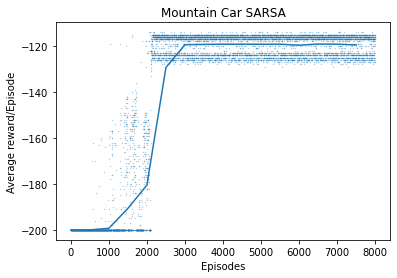

In [57]:
DISCRETE_BUCKETS = 20
EPISODES = 8000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': []}

for episode in range(EPISODES):
	episode_reward = 0
	done = False

	curr_discrete_state = discretised_state(env.reset())
	action = get_action(curr_discrete_state)

	while not done:		
		new_state, reward, done, _ = env.step(action)
		new_discrete_state = discretised_state(new_state)
		new_action = get_action(new_discrete_state)

		if not done:
			current_q = Q_TABLE[curr_discrete_state+(action,)]			
			max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
			new_q = current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q-current_q)
			Q_TABLE[curr_discrete_state+(action,)]=new_q
		elif new_state[0] >= env.goal_position:
			Q_TABLE[curr_discrete_state + (action,)] = 0

		curr_discrete_state = new_discrete_state
		action = new_action

		episode_reward += reward

	EPSILON = EPSILON - EPSILON_DECREMENTER

	ep_rewards.append(episode_reward)

	if not episode % EPISODE_DISPLAY:
		avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
		ep_rewards_table['ep'].append(episode)
		ep_rewards_table['avg'].append(avg_reward)
		
		print(f"Episode:{episode} avg:{avg_reward}")

env.close()

plt.scatter(range(len(ep_rewards)), ep_rewards, s=0.1, alpha=0.5)
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'])
plt.title('Mountain Car SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

Episode:0 avg:-200.0
Episode:500 avg:-200.0
Episode:1000 avg:-200.0
Episode:1500 avg:-200.0
Episode:2000 avg:-200.0
Episode:2500 avg:-200.0
Episode:3000 avg:-200.0
Episode:3500 avg:-200.0
Episode:4000 avg:-200.0
Episode:4500 avg:-200.0
Episode:5000 avg:-200.0
Episode:5500 avg:-200.0
Episode:6000 avg:-200.0
Episode:6500 avg:-200.0
Episode:7000 avg:-200.0
Episode:7500 avg:-200.0
Episode:8000 avg:-200.0
Episode:8500 avg:-200.0
Episode:9000 avg:-200.0
Episode:9500 avg:-200.0


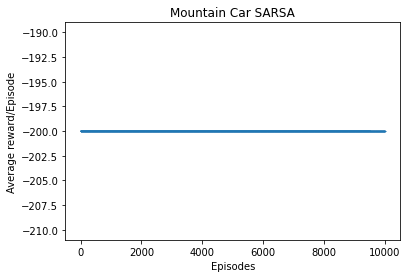

In [14]:
#on-policy expected SARSA
DISCRETE_BUCKETS = 20
EPISODES = 10000
GAMMA = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
#EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': []}

for episode in range(EPISODES):
  episode_reward = 0
  done = False
  curr_discrete_state = discretised_state(env.reset())
  action = get_action(curr_discrete_state)

  while not done:		
    new_state, reward, done, _ = env.step(action)
    new_discrete_state = discretised_state(new_state)
    
    if not done:
      current_q = Q_TABLE[curr_discrete_state + (action,)]
      future_q = Q_TABLE[new_discrete_state]
      #Here p is the actual eps-soft probabilities
      p = np.full(len(future_q), fill_value = EPSILON/len(future_q))
      print(f'p{p}')
      p[np.argmax(future_q)] += 1.0 - EPSILON
      print(f'p{p}')

      new_q = current_q + LEARNING_RATE * (reward + GAMMA * (future_q @ p) - current_q)
      Q_TABLE[curr_discrete_state + (action,)] = new_q

    curr_discrete_state = new_discrete_state
    action = new_action

    episode_reward += reward

  #EPSILON = max(0.0001, EPSILON - EPSILON_DECREMENTER)

  ep_rewards.append(episode_reward)

  if not episode % EPISODE_DISPLAY:
    avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
    ep_rewards_table['ep'].append(episode)
    ep_rewards_table['avg'].append(avg_reward)
    print(f"Episode:{episode} avg:{avg_reward}")

env.close()


plt.scatter(range(len(ep_rewards)), ep_rewards, s=0.1, alpha=0.5)
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'])
plt.title('Mountain Car SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

In [56]:
env.action_space

Discrete(3)

In [54]:
env.action_space.n

3

In [ ]:
#off-policy expected SARSA with a greedy control policy
DISCRETE_BUCKETS = 20
EPISODES = 10000
GAMMA = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': []}

for episode in range(EPISODES):
	episode_reward = 0
	done = False

	curr_discrete_state = discretised_state(env.reset())
	action = get_action(curr_discrete_state)

	while not done:		
		new_state, reward, done, _ = env.step(action)
		new_discrete_state = discretised_state(new_state)
		new_action = get_action(new_discrete_state)

		if not done:
			current_q = Q_TABLE[curr_discrete_state + (action,)]			
			future_q = Q_TABLE[new_discrete_state + (new_action,)]
			new_q = current_q + LEARNING_RATE * (reward + GAMMA * future_q - current_q)
			Q_TABLE[curr_discrete_state + (action,)] = new_q
		elif new_state[0] >= env.goal_position:
			Q_TABLE[curr_discrete_state + (action,)] = 0

		curr_discrete_state = new_discrete_state
		action = new_action

		episode_reward += reward

	EPSILON = max(0.0001, EPSILON - EPSILON_DECREMENTER)

	ep_rewards.append(episode_reward)

	if not episode % EPISODE_DISPLAY:
		avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
		ep_rewards_table['ep'].append(episode)
		ep_rewards_table['avg'].append(avg_reward)

env.close()


plt.scatter(range(len(ep_rewards)), ep_rewards, s=0.1, alpha=0.5)
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'])
plt.title('Mountain Car SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()